### This notebook exists to validate that the TD algorithm is infact learning

In [1]:
# Set magic reload
%load_ext autoreload
%autoreload 2
# Add python path
import sys
sys.path.append('..')


In [2]:
# Setup the environment
from train import TicTacToeEnv
env = TicTacToeEnv()
print("Initial board: ", env.board)
print("Initial player: ", env.current_player)

Initial board:  ['-', '-', '-', '-', '-', '-', '-', '-', '-']
Initial player:  X


In [3]:
# Test the wind conditions
# row
env.current_player = 'X'
env.board[0] = 'X'
env.board[1] = 'X'
env.board[2] = 'X'
print("board: ", env.board)
print("Checking win: ", env._check_win())
env.reset()
# column
env.current_player = 'O'
env.board[0] = 'O'
env.board[3] = 'O'
env.board[6] = 'O'
print("board: ", env.board)
print("Checking win: ", env._check_win())
env.reset()
# diagonal
env.current_player = 'X'
env.board[0] = 'X'
env.board[4] = 'X'
env.board[8] = 'X'
print("board: ", env.board)
print("Checking win: ", env._check_win())
env.reset()

# Test draw condition
env.board = [
    'X', '0', 'X',
    'X', 'O', 'O',
    'O', 'X', 'X'
]
print("board: ", env.board)
print("Checking win: ", env._check_win())
env.reset()

board:  ['X', 'X', 'X', '-', '-', '-', '-', '-', '-']
Checking win:  True
board:  ['O', '-', '-', 'O', '-', '-', 'O', '-', '-']
Checking win:  True
board:  ['X', '-', '-', '-', 'X', '-', '-', '-', 'X']
Checking win:  True
board:  ['X', '0', 'X', 'X', 'O', 'O', 'O', 'X', 'X']
Checking win:  False


['-', '-', '-', '-', '-', '-', '-', '-', '-']

In [4]:
# Setup the Agent
from rl_agents.td_learning import TDAgent
agent = TDAgent(learning_rate=0.01, discount_factor=0.99, epsilon=0.4, player='x', debug=True)
# validate the state key
print("State key: ", agent.get_state_key(env.board))
# validate valid moves
print("Valid moves: ", agent.get_valid_moves(env.board))
# check current value
print("Current value: ", agent.get_value(agent.get_state_key(env.board)))


State key:  ---------
Valid moves:  [0, 1, 2, 3, 4, 5, 6, 7, 8]
Current value:  0.0


In [5]:
# Validate state update
env.reset()
initial_state = agent.get_state_key(env.board)
# Make a move and create next state
next_state = 'X--------'
reward = 0  # No immediate reward for this move

# Update the value function
print("\nUpdating value function...")
agent.update(initial_state, next_state, reward)
print("Updated initial state value:", agent.get_value(initial_state))

# Make another move and update
next_state_2 = 'XO-------'
print("\nUpdating value function again...")
agent.update(next_state, next_state_2, reward)
print("Value after first move (X):", agent.get_value(next_state))

# Test winning scenario
winning_state = 'XXX------'
print("\nUpdating with winning state...")
agent.update(next_state_2, winning_state, 1.0)  # Reward of 1.0 for winning
print("Value of state before win:", agent.get_value(next_state_2))

# Print all states and their values
print("\nAll learned state values:")
for state in agent.value_function:
    print(f"State: {state}, Value: {agent.value_function[state]:.4f}")


Updating value function...
Updated initial state value: 0.0

Updating value function again...
Value after first move (X): 0.0

Updating with winning state...
Value of state before win: 0.01

All learned state values:
State: ---------, Value: 0.0000
State: X--------, Value: 0.0000
State: XO-------, Value: 0.0100
State: XXX------, Value: 0.0000


Training Progress:

Iteration 10:
State: ---------, Value: 0.0297
State: X--------, Value: 0.1117
State: XO-------, Value: 0.3604
State: XXX------, Value: 0.9562

Iteration 20:
State: ---------, Value: 0.1822
State: X--------, Value: 0.3972
State: XO-------, Value: 0.7119
State: XXX------, Value: 1.0000

Iteration 30:
State: ---------, Value: 0.3796
State: X--------, Value: 0.6070
State: XO-------, Value: 0.8344
State: XXX------, Value: 1.0000

Iteration 40:
State: ---------, Value: 0.5333
State: X--------, Value: 0.7186
State: XO-------, Value: 0.8771
State: XXX------, Value: 1.0000

Iteration 50:
State: ---------, Value: 0.6285
State: X--------, Value: 0.7710
State: XO-------, Value: 0.8920
State: XXX------, Value: 1.0000

Iteration 60:
State: ---------, Value: 0.6805
State: X--------, Value: 0.7939
State: XO-------, Value: 0.8972
State: XXX------, Value: 1.0000

Iteration 70:
State: ---------, Value: 0.7066
State: X--------, Value: 0.8035
State: XO-------, Value: 0.8990
State: XXX--

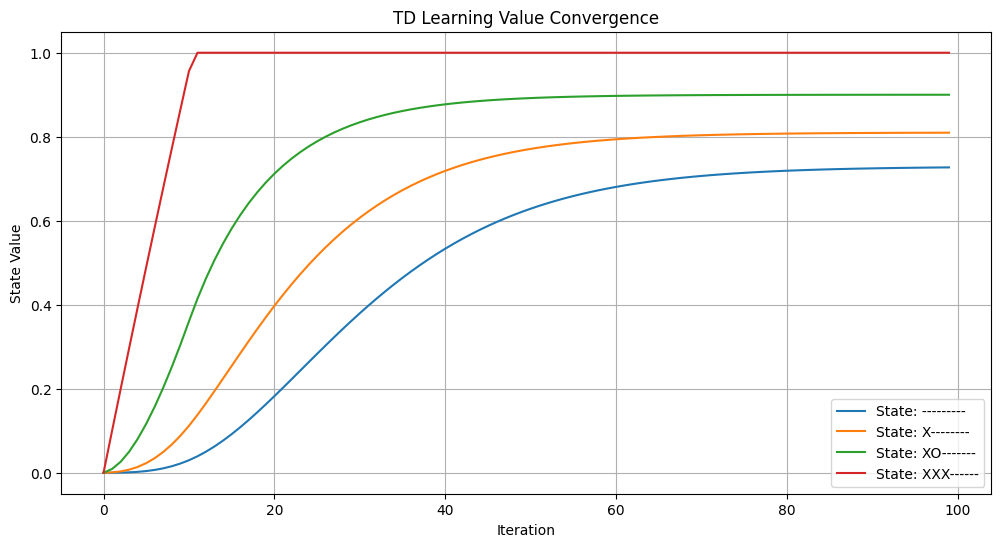

In [6]:
# Create a fresh agent for testing
agent = TDAgent(learning_rate=0.1, discount_factor=0.9, epsilon=0.0, player='X', debug=True)

# States we want to track
states = [
    '---------',  # Initial state
    'X--------',  # After first X move
    'XO-------',  # After O's move
    'XXX------'   # Winning state
]

# Track values over iterations
values_history = {state: [] for state in states}

# Run updates for multiple iterations
n_iterations = 100
print("Training Progress:")

for i in range(n_iterations):
    # Store current values
    for state in states:
        values_history[state].append(agent.get_value(state))
    
    # Perform updates - note we don't need to update winning state separately now
    agent.update(states[3], states[3], 1)  # Update winning state itself
    agent.update(states[2], states[3], 0)  # Terminal state update (XO -> XXX with reward)
    agent.update(states[1], states[2], 0)  # Non-terminal (X -> XO)
    agent.update(states[0], states[1], 0)  # Non-terminal (empty -> X)
    
    # Print progress every 10 iterations
    if (i + 1) % 10 == 0:
        print(f"\nIteration {i + 1}:")
        for state in states:
            print(f"State: {state}, Value: {agent.get_value(state):.4f}")

# Plot the learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for state in states:
    plt.plot(values_history[state], label=f"State: {state}")

plt.xlabel('Iteration')
plt.ylabel('State Value')
plt.title('TD Learning Value Convergence')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from train import TicTacToeEnv
from rl_agents.td_learning import TDAgent
import numpy as np

def print_board(board):
    for i in range(0, 9, 3):
        print(f"{board[i]} | {board[i+1]} | {board[i+2]}")
        if i < 6:
            print("---------")

# First train the agent
env = TicTacToeEnv()
agent = TDAgent(learning_rate=0.1, discount_factor=0.9, epsilon=0.2, player='X')

# Train against random opponent
print("Training agent...")
n_episodes = 10000
for episode in range(n_episodes):
    state = env.reset()
    done = False
    agent.reset_episode()  # Reset episode state

    while not done:
        # Agent's turn (X)
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.update(agent.get_state_key(state), agent.get_state_key(next_state), reward)
        if done:
            # Handle terminal state
            agent.end_of_episode_update(reward)
            break
            
        # Random opponent's turn (O)
        valid_moves = [i for i, mark in enumerate(next_state) if mark == '-']
        if valid_moves:
            o_action = np.random.choice(valid_moves)
            state, reward, done = env.step(o_action)
        
    if episode % 1000 == 0:
        print(f"Episode {episode}")

# Now test the trained agent
print("\nTesting critical positions...")

# Test winning opportunity
test_board = ['X', 'X', '-', '-', '-', '-', '-', '-', '-']
print("\nWinning opportunity:")
print_board(test_board)
print(f"Value: {agent.get_value(agent.get_state_key(test_board)):.4f}")
valid_moves = [i for i, mark in enumerate(test_board) if mark == '-']
print("\nPossible moves and their values:")
for move in valid_moves:
    next_board = test_board.copy()
    next_board[move] = 'X'
    next_value = agent.get_value(agent.get_state_key(next_board))
    print(f"Move {move}: Value = {next_value:.4f}")

# Test diagonal opportunity
test_board = ['X', '-', '-', '-', 'X', '-', '-', '-', '-']
print("\nDiagonal opportunity:")
print_board(test_board)
print(f"Value: {agent.get_value(agent.get_state_key(test_board)):.4f}")
valid_moves = [i for i, mark in enumerate(test_board) if mark == '-']
print("\nPossible moves and their values:")
for move in valid_moves:
    next_board = test_board.copy()
    next_board[move] = 'X'
    next_value = agent.get_value(agent.get_state_key(next_board))
    print(f"Move {move}: Value = {next_value:.4f}")

# Test blocking opportunity
test_board = ['O', 'O', '-', 'X', 'X', '-', '-', '-', '-']
print("\nMust block:")
print_board(test_board)
print(f"Value: {agent.get_value(agent.get_state_key(test_board)):.4f}")
valid_moves = [i for i, mark in enumerate(test_board) if mark == '-']
print("\nPossible moves and their values:")
for move in valid_moves:
    next_board = test_board.copy()
    next_board[move] = 'X'
    next_value = agent.get_value(agent.get_state_key(next_board))
    print(f"Move {move}: Value = {next_value:.4f}")

Training agent...
Episode 0
Episode 1000
Episode 2000
Episode 3000
Episode 4000
Episode 5000
Episode 6000
Episode 7000
Episode 8000
Episode 9000

Testing critical positions...

Winning opportunity:
X | X | -
---------
- | - | -
---------
- | - | -
Value: 0.0000

Possible moves and their values:
Move 2: Value = 0.0000
Move 3: Value = 0.0000
Move 4: Value = 0.0000
Move 5: Value = 0.0000
Move 6: Value = 0.0000
Move 7: Value = 0.0000
Move 8: Value = 0.0000

Diagonal opportunity:
X | - | -
---------
- | X | -
---------
- | - | -
Value: 0.0000

Possible moves and their values:
Move 1: Value = 0.0000
Move 2: Value = 0.0000
Move 3: Value = 0.0000
Move 5: Value = 0.0000
Move 6: Value = 0.0000
Move 7: Value = 0.0000
Move 8: Value = 0.0000

Must block:
O | O | -
---------
X | X | -
---------
- | - | -
Value: 1.0000

Possible moves and their values:
Move 2: Value = 0.0000
Move 5: Value = 1.0000
Move 6: Value = 0.0000
Move 7: Value = 0.0000
Move 8: Value = 0.0000


In [ ]:
from train import TicTacToeEnv
from rl_agents.td_learning import SelfPlayAgent
import numpy as np

def print_board(board):
    for i in range(0, 9, 3):
        print(f"{board[i]} | {board[i+1]} | {board[i+2]}")
        if i < 6:
            print("---------")

# First train the agent
env = TicTacToeEnv()
agent = SelfPlayAgent(learning_rate=0.01, discount_factor=0.9, epsilon=0.5, player='X')

# Train against random opponent
print("Training agent...")
n_episodes = 10000
for episode in range(n_episodes):
    state = env.reset()
    done = False
    agent.reset_episode()  # Reset episode state

    while not done:
        # Agent's turn (X)
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.update(agent.get_state_key(state), agent.get_state_key(next_state), reward)
        if done:
            # Handle terminal state
            agent.end_of_episode_update(reward)
            break
            
        # Random opponent's turn (O)
        valid_moves = [i for i, mark in enumerate(next_state) if mark == '-']
        if valid_moves:
            o_action = np.random.choice(valid_moves)
            state, reward, done = env.step(o_action)
        
    if episode % 1000 == 0:
        print(f"Episode {episode}")

# Now test the trained agent
print("\nTesting critical positions...")

# Test winning opportunity
test_board = ['X', 'X', '-', 'O', '-', '-', 'O', '-', '-']
print("\nWinning opportunity:")
print_board(test_board)
print(f"Value: {agent.get_value(agent.get_state_key(test_board), debug=True):.4f}")
valid_moves = [i for i, mark in enumerate(test_board) if mark == '-']
print("\nPossible moves and their values:")
for move in valid_moves:
    next_board = test_board.copy()
    next_board[move] = 'X'
    next_value = agent.get_value(agent.get_state_key(next_board))
    print(f"Move {move}: Value = {next_value:.4f}")

# Test diagonal opportunity
test_board = ['X', '-', 'O', 'O', 'X', '-', '-', '-', '-']
print("\nDiagonal opportunity:")
print_board(test_board)
print(f"Value: {agent.get_value(agent.get_state_key(test_board), debug=True):.4f}")
valid_moves = [i for i, mark in enumerate(test_board) if mark == '-']
print("\nPossible moves and their values:")
for move in valid_moves:
    next_board = test_board.copy()
    next_board[move] = 'X'
    next_value = agent.get_value(agent.get_state_key(next_board))
    print(f"Move {move}: Value = {next_value:.4f}")

# Test blocking opportunity
test_board = ['O', 'O', '-', 'X', 'X', '-', '-', '-', '-']
print("\nMust block:")
print_board(test_board)
print(f"Value: {agent.get_value(agent.get_state_key(test_board)):.4f}")
valid_moves = [i for i, mark in enumerate(test_board) if mark == '-']
print("\nPossible moves and their values:")
for move in valid_moves:
    next_board = test_board.copy()
    next_board[move] = 'X'
    next_value = agent.get_value(agent.get_state_key(next_board))
    print(f"Move {move}: Value = {next_value:.4f}")

Training agent...
Episode 0
Episode 1000
Episode 2000
Episode 3000
Episode 4000
Episode 5000
Episode 6000
Episode 7000
Episode 8000
Episode 9000

Testing critical positions...

Winning opportunity:
X | X | -
---------
O | - | -
---------
O | - | -
Value: 0.0167

Possible moves and their values:
Move 2: Value = 1.0000
Move 4: Value = 0.0000
Move 5: Value = 0.0000
Move 7: Value = 0.0000
Move 8: Value = 0.0000

Diagonal opportunity:
X | - | O
---------
O | X | -
---------
- | - | -
Value: 0.0249

Possible moves and their values:
Move 1: Value = 0.0000
Move 5: Value = 0.0000
Move 6: Value = 0.0000
Move 7: Value = 0.0000
Move 8: Value = 1.0000

Must block:
O | O | -
---------
X | X | -
---------
- | - | -
Value: 0.0262

Possible moves and their values:
Move 2: Value = 0.0000
Move 5: Value = 1.0000
Move 6: Value = 0.0000
Move 7: Value = 0.0000
Move 8: Value = 0.0000
